## 异常检测 - DeepOD

In [182]:
import numpy as np
import pandas as pd
import time as time
import torch
from sklearn.metrics import precision_recall_curve, roc_auc_score, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from deepod.models.tabular import DeepSVDD

#### 训练集（未经标准化）

In [183]:
train_data = pd.read_csv("train_data.csv", skiprows=1, header=None)
test_data = pd.read_csv("test_data.csv", skiprows=1, header=None)

In [184]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,196,197,198
0,0,0.115937,72,74,4238,63516,1250.679227,31,29,2.884325e+05,...,False,True,False,False,False,False,False,False,Normal,0
1,1,0.257944,8,12,424,8824,73.659402,31,29,1.150637e+04,...,False,True,False,False,False,False,False,False,Normal,0
2,2,0.000007,2,0,900,0,142857.140900,254,0,5.142857e+08,...,False,False,True,False,False,False,False,False,Normal,0
3,3,0.052844,60,62,3614,50036,2289.758573,31,29,5.380365e+05,...,False,True,False,False,False,False,False,False,Normal,0
4,4,0.001032,2,2,146,178,2906.976908,31,29,5.658915e+05,...,False,False,False,False,False,False,False,False,Normal,0


In [185]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,196,197,198
0,0,0.600851,6,2,978,86,11.650143,62,252,1.085128e+04,...,False,False,False,False,False,False,False,False,Normal,0
1,1,0.000944,2,2,130,162,3177.966006,31,29,5.508474e+05,...,False,False,False,False,False,False,False,False,Normal,0
2,2,0.001040,2,2,146,178,2884.615377,31,29,5.615384e+05,...,False,False,False,False,False,False,False,False,Normal,0
3,3,1.052931,10,10,804,1152,18.044868,62,252,5.500835e+03,...,False,True,False,False,False,False,False,False,Normal,0
4,4,0.000005,2,0,200,0,200000.005100,254,0,1.600000e+08,...,False,False,True,False,False,False,False,False,Analysis,1


In [186]:
y_train = train_data[198]
attributes = train_data.iloc[:, 1:-2]

In [187]:
attributes.head()

,1,2,3,4,5,6,7,8,9,10,...,187,188,189,190,191,192,193,194,195,196
0,0.115937,72,74,4238,63516,1250.679227,31,29,2.884325e+05,4.323590e+06,...,False,False,False,True,False,False,False,False,False,False
1,0.257944,8,12,424,8824,73.659402,31,29,1.150637e+04,2.508762e+05,...,False,False,False,True,False,False,False,False,False,False
2,0.000007,2,0,900,0,142857.140900,254,0,5.142857e+08,0.000000e+00,...,False,False,False,False,True,False,False,False,False,False
3,0.052844,60,62,3614,50036,2289.758573,31,29,5.380365e+05,7.452729e+06,...,False,False,False,True,False,False,False,False,False,False
4,0.001032,2,2,146,178,2906.976908,31,29,5.658915e+05,6.899225e+05,...,False,True,False,False,False,False,False,False,False,False


In [188]:
attributes = attributes.astype(np.float32)
y_train = y_train.astype(np.float32)

attributes = attributes.to_numpy(dtype=float)
y_train = y_train.to_numpy(dtype=float)

attributes = torch.tensor(attributes, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

attributes = attributes.numpy()
y_train = y_train.numpy()

In [189]:
clf = DeepSVDD()

In [190]:
train_start = time.time()
clf.fit(attributes, y=None)
train_end = time.time()
print("Running Time:",train_end - train_start)

Start Training...
ensemble size: 1
MLPnet(
  (network): Sequential(
    (0): LinearBlock(
      (linear): Linear(in_features=196, out_features=100, bias=False)
      (act_layer): ReLU()
    )
    (1): LinearBlock(
      (linear): Linear(in_features=100, out_features=50, bias=False)
      (act_layer): ReLU()
    )
    (2): LinearBlock(
      (linear): Linear(in_features=50, out_features=128, bias=False)
      (act_layer): Identity()
    )
  )
)
epoch  1, training loss: 13326842790824842.000000, time: 2.2s
epoch 10, training loss: 7068685427213362.000000, time: 2.5s
epoch 20, training loss: 5803510947492982.000000, time: 2.4s
epoch 30, training loss: 5120394816917705.000000, time: 2.4s
epoch 40, training loss: 5071810646193807.000000, time: 2.4s
epoch 50, training loss: 4935534498184679.000000, time: 2.4s
epoch 60, training loss: 5026616930381891.000000, time: 2.4s
epoch 70, training loss: 4875773561377507.000000, time: 2.5s
epoch 80, training loss: 4876077932805070.000000, time: 2.5s
ep

testing: 100%|██████████| 976/976 [00:00<00:00, 1000.47it/s]

Running Time: 243.54488348960876


In [191]:
scores = clf.decision_function(attributes)

testing: 100%|██████████| 976/976 [00:00<00:00, 1218.32it/s]


In [192]:
fpr, tpr, thresholds = roc_curve(y_train, scores, pos_label=1)
auc_score = auc(fpr, tpr)

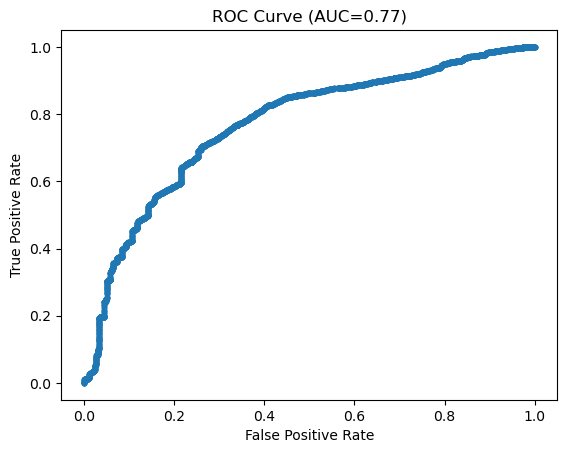

In [193]:
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC={:.2f})'.format(auc_score))
plt.show()

In [194]:
print("AUROC of test data:", auc_score)

AUROC of test data: 0.7698636562280113


In [195]:
precision, recall, thresholds = precision_recall_curve(y_train, scores, pos_label=1)

In [196]:
auprc = auc(recall, precision)

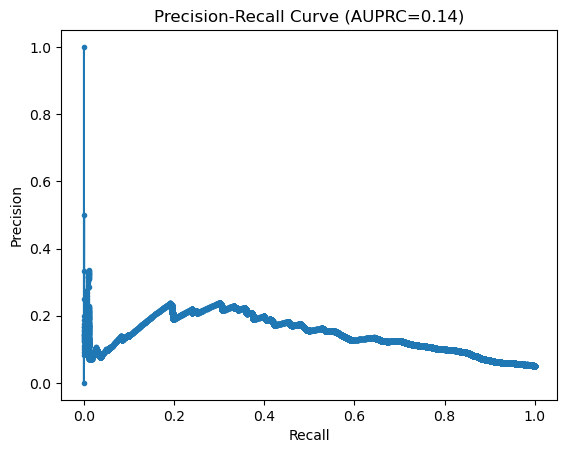

In [197]:
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AUPRC={:.2f})'.format(auprc))
plt.show()

In [198]:
print("AUPRC of test data:", auprc)

AUPRC of test data: 0.14471233688370777


#### 测试集（未经标准化）

In [199]:
y_test = test_data[198]
test_attr = test_data.iloc[:, 1:-2]
test_attr.head()

,1,2,3,4,5,6,7,8,9,10,...,187,188,189,190,191,192,193,194,195,196
0,0.600851,6,2,978,86,11.650143,62,252,1.085128e+04,572.521301,...,False,True,False,False,False,False,False,False,False,False
1,0.000944,2,2,130,162,3177.966006,31,29,5.508474e+05,686440.687500,...,False,True,False,False,False,False,False,False,False,False
2,0.001040,2,2,146,178,2884.615377,31,29,5.615384e+05,684615.375000,...,False,True,False,False,False,False,False,False,False,False
3,1.052931,10,10,804,1152,18.044868,62,252,5.500835e+03,7878.958984,...,False,False,False,True,False,False,False,False,False,False
4,0.000005,2,0,200,0,200000.005100,254,0,1.600000e+08,0.000000,...,False,False,False,False,True,False,False,False,False,False


In [200]:
test_attr = test_attr.astype(np.float32)
y_test = y_test.astype(np.float32)

test_attr = test_attr.to_numpy(dtype=float)
y_test = y_test.to_numpy(dtype=float)

test_attr = torch.tensor(test_attr, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

test_attr = test_attr.numpy()
y_test = y_test.numpy()

In [201]:
test_start = time.time()
test_predictions = clf.predict(test_attr)
test_end = time.time()
print("Running Time:", test_end - test_start, "seconds")

testing: 100%|██████████| 354/354 [00:00<00:00, 1102.08it/s]

Running Time: 0.34215569496154785 seconds


In [202]:
scores_test = clf.decision_function(test_attr)

testing: 100%|██████████| 354/354 [00:00<00:00, 1163.31it/s]


In [203]:
fpr, tpr, thresholds = roc_curve(y_test, scores_test, pos_label=1)
auc_score = auc(fpr, tpr)

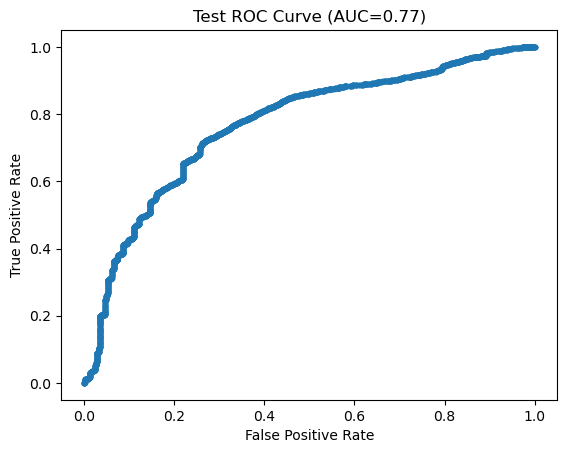

In [204]:
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC Curve (AUC={:.2f})'.format(auc_score))
plt.show()

In [205]:
print("AUROC of test data:", auc_score)

AUROC of test data: 0.7695563878505133


In [206]:
precision, recall, thresholds = precision_recall_curve(y_test, scores_test, pos_label=1)

In [207]:
auprc = auc(recall, precision)

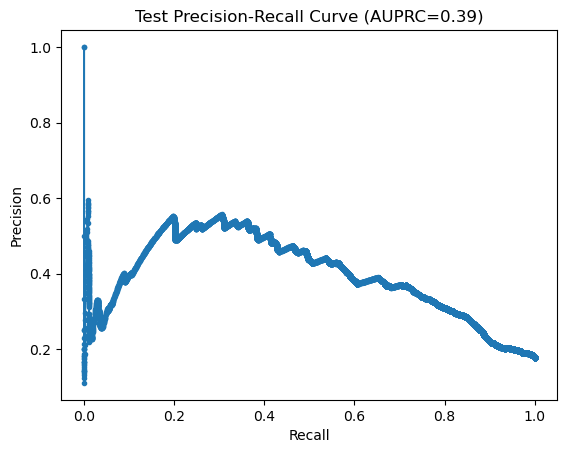

In [208]:
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Test Precision-Recall Curve (AUPRC={:.2f})'.format(auprc))
plt.show()

In [209]:
print("AUPRC of test data:", auprc)

AUPRC of test data: 0.3942937594274245
